In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import pickle
import re

from station import *

In [81]:
system_daily =pickle.load(open('./pickle/system_daily.pickle','rb'))

In [82]:
system_daily = system_daily.transpose()
system_daily.head()

date_time,2018-06-17 00:00:00,2018-06-17 01:00:00,2018-06-17 02:00:00,2018-06-17 03:00:00,2018-06-17 04:00:00,2018-06-17 05:00:00,2018-06-17 06:00:00,2018-06-17 07:00:00,2018-06-17 08:00:00,2018-06-17 09:00:00,...,2018-12-27 14:00:00,2018-12-27 15:00:00,2018-12-27 16:00:00,2018-12-27 17:00:00,2018-12-27 18:00:00,2018-12-27 19:00:00,2018-12-27 20:00:00,2018-12-27 21:00:00,2018-12-27 22:00:00,2018-12-27 23:00:00
daily_72,5.454632,4.332558,3.025770,2.398521,2.582759,2.773675,1.928679,-0.256874,-3.014521,-5.129110,...,-5.450465,-4.652501,-2.818080,-0.478488,1.486827,2.633525,3.266699,3.984441,4.946995,5.649887
daily_79,-6.216447,-6.375367,-6.290292,-5.931492,-5.699004,-5.764029,-5.541173,-3.997702,-0.629433,3.836297,...,9.372757,9.309896,8.413640,5.717097,1.429303,-3.022866,-6.048263,-7.065893,-6.758233,-6.273075
daily_82,0.569110,0.526706,0.655418,0.873200,1.008181,0.931954,0.638982,0.219216,-0.226538,-0.638532,...,-0.779835,-0.518080,-0.384151,-0.352197,-0.289344,-0.077912,0.267621,0.598888,0.755501,0.704085
daily_83,-5.503351,-5.859911,-6.062830,-6.145774,-6.351337,-6.653706,-6.450526,-4.919510,-1.823533,2.020936,...,7.366947,8.639881,9.295243,8.108245,4.947503,0.933555,-2.426971,-4.318618,-4.985721,-5.205960
daily_119,0.618744,0.533980,0.392625,0.385255,0.559114,0.759469,0.768292,0.508543,0.116228,-0.188613,...,-0.901070,-0.958436,-0.762392,-0.440332,-0.195267,-0.116226,-0.107784,-0.006065,0.239658,0.506080


In [83]:
system_daily.index =  pd.Index([re.findall('\d+', i)[0] for i in system_daily.index])

In [84]:
system_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 72 to 3514
Columns: 4656 entries, 2018-06-17 00:00:00 to 2018-12-27 23:00:00
dtypes: float64(4656)
memory usage: 23.6+ MB


In [85]:
scaler = StandardScaler()

system_daily_scl = scaler.fit_transform(system_daily)


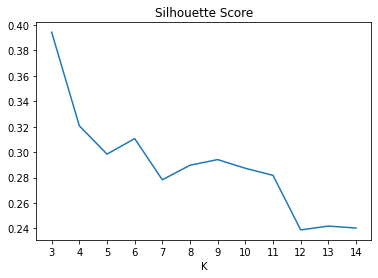

In [86]:
k_means = []
sil_scores = []

for k in range(3,15):
    model = KMeans(n_clusters=k).fit(system_daily_scl)
    k_means.append(model)
    sil_scores.append(silhouette_score(system_daily_scl,model.labels_))
    
plt.plot(range(3,15),sil_scores)
plt.xticks(range(3,15))
plt.title('Silhouette Score')
plt.xlabel('K')
plt.show()

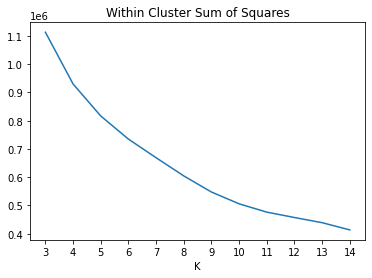

In [87]:
wcss = [model.inertia_ for model in k_means]

plt.plot(range(3,15),wcss)
plt.xticks(range(3,15))
plt.title('Within Cluster Sum of Squares')
plt.xlabel('K')
plt.show()
    

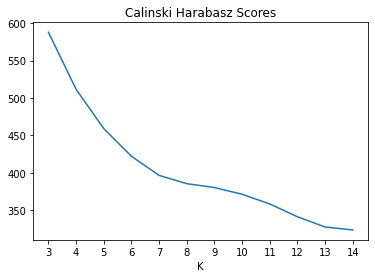

In [88]:
CH = [calinski_harabasz_score(system_daily_scl, model.labels_) for model in k_means]

plt.plot(range(3,15),CH)
plt.xticks(range(3,15))
plt.title('Calinski Harabasz Scores')
plt.xlabel('K')
plt.show()

In [89]:
year_2018 = pickle.load(open('./pickle/historical.pickle','rb'))

In [136]:
clusters = year_2018.droplevel(-1)[['_lat','_long']].drop_duplicates()
clusters.index = geopoint.index.astype(str)
clusters = clusters[clusters.index.isin(system_daily.index)]
clusters = clusters.reset_index().drop_duplicates(subset='station_id',
                                       keep='first').set_index('station_id')

In [137]:
for model in k_means:
    clusters['KMeans_'+str(model.n_clusters)] = [str(i) for i in model.labels_]

In [138]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 72 to 3514
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _lat       664 non-null    float64
 1   _long      664 non-null    float64
 2   KMeans_3   664 non-null    object 
 3   KMeans_4   664 non-null    object 
 4   KMeans_5   664 non-null    object 
 5   KMeans_6   664 non-null    object 
 6   KMeans_7   664 non-null    object 
 7   KMeans_8   664 non-null    object 
 8   KMeans_9   664 non-null    object 
 9   KMeans_10  664 non-null    object 
 10  KMeans_11  664 non-null    object 
 11  KMeans_12  664 non-null    object 
 12  KMeans_13  664 non-null    object 
 13  KMeans_14  664 non-null    object 
dtypes: float64(2), object(12)
memory usage: 77.8+ KB


In [140]:
import json

#get mapbox API key for plotting
path = '/Users/mitchellkrieger/.secret/mapbox_api.json'

with open(path) as f:
    api = json.load(f)
    
api_key = api['api_token']

In [148]:
px.set_mapbox_access_token(api_key)
fig = px.scatter_mapbox(clusters, lat="_lat", lon="_long",
                        hover_name=clusters.index,hover_data=clusters.columns[2:],
                        color='KMeans_3',
                        zoom=12.5,width=800,height=800)

fig.show()